# ImagoPost - Gerador de conteúdo para blog


O objetivo deste projeto é gerar textos criativos para blogs a partir de uma imagem através de uma *Large Language Model* (LLM).

Este projeto utiliza a biblioteca `google-generativeai`, que se conecta ao **Google Gemini** através de uma API e envia as imagens fornecidas pelo usuário. O modelo de linguagem então retorna o *prompt* com um texto criativo para blog no formato **Markdown**.

## Configurações do Google Gemini

Para utilizareste projeto, você deve gerar sua API key dentro do [Google AI Studio](https://aistudio.google.com/app/apikey). Não se esqueça de copiar sua chave, pois ela ficará disponível para você somente no momento da criação. Depois, vá até a barra lateral esquerda do Google Colab e clique no ícone de chave. Com o gerenciador de *secrets* aberto, crie um novo *secret*, cole sua API key no campo **Valor** e dê o nome de `gemini_api_key`.

Como o objetivo do sistema é gerar conteúdo para serem publicados em um blog, as configurações de segurança foram definidas como médias. Dessa forma, garantimos um filtro de conteúdo mais robusto antes do texto passar pela análise revisão.

In [ ]:
# Instalação da biblioteca google-generativeai
!pip install -q -U google-generativeai

# Importações das bibliotecas necessárias para configurar o Google Gemini
import google.generativeai as genai
from google.colab import userdata

# Conexão com o Google Gemini através da API key
API_KEY = userdata.get('gemini_api_key')
genai.configure(api_key=API_KEY)

# Configurações de temperatura da LLM
generation_config = {
    "temperature": 0.85,
}

# Configurações de segurança do conteúdo gerado pela LLM
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
]

# Definição das configurações do Google Gemini
model = genai.GenerativeModel(
    model_name="gemini-1.5-pro-latest",
    generation_config=generation_config,
    safety_settings=safety_settings
)

## Configurações do projeto

Este projeto vai solicitar acesso ao seu Google Drive com o único intuito de salvar as imagens enviadas em uma pasta chamada **ImagoPost**. Se você concordar com estes termos e conceder acesso ao seu Google Drive, execute o código na célula abaixo para definir as configurações do projeto e, posteriormente, execute o código na célula seguinte para enviar sua imagem ao **Google Gemini** e receber seu post.

In [ ]:
# Importações das bibliotecas necessárias para o projeto
from google.colab import files
import os
from IPython.display import Image, Markdown, clear_output
from PIL import Image as PIL_Image

# Estabelecimento de conexão com o Google Drive do usuário
from google.colab import drive
drive.mount('/content/drive')

# Definição de uma função para redimensionar a imagem enviada pelo usuário para apresentá-la em tela
def resize_and_display(image, max_height):
    width, height = image.size
    new_height = min(height, max_height)
    new_width = int(width * (new_height / height))
    resized_image = image.resize((new_width, new_height))
    display(resized_image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


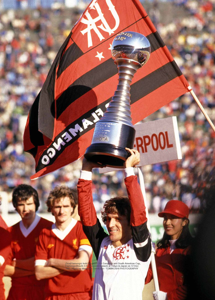

## A Glória Eterna: Um Mergulho no Significado dos Títulos para os Torcedores

Há momentos na vida que transcendem o simples ato de existir e se transformam em marcos indeléveis na memória. Para os amantes do esporte, a conquista de um título é um desses momentos. A imagem de um jogador erguendo a taça, o abraço emocionado dos companheiros, o rugido da torcida extasiada – tudo isso compõe um mosaico de sensações que se fundem em pura alegria, em um sentimento de pertencimento e realização. 

O título não é apenas um troféu de metal, mas a materialização de um sonho compartilhado. Ele representa a culminação de anos de trabalho árduo, de superação e de uma fé inabalável na capacidade de alcançar o topo. Cada gota de suor derramada nos treinos, cada lágrima derramada em derrotas, cada grito de incentivo entoado nas arquibancadas se transformam em combustível para alimentar a busca incansável pela vitória. Para os torcedores, a conquista representa a validação de suas próprias lutas e aspirações, um lembrete de que a perseverança e a união podem superar qualquer obstáculo. O título se torna um símbolo de orgulho, um legado que atravessa gerações e alimenta a paixão pelo esporte. 

Em última análise, a glória de um título reside na sua capacidade de transcender o tempo e o espaço. Ele se torna parte da história, um capítulo inesquecível na narrativa de um clube, de uma cidade, de um país. A memória da conquista, cristalizada em fotos, vídeos e relatos emocionados, serve como um farol para as gerações futuras, inspirando-as a perseguir seus próprios sonhos e a escrever novas páginas na história do esporte. A taça erguida, a festa da torcida, a emoção estampada nos rostos – tudo isso compõe um legado imortal, um testemunho da força do espírito humano e da magia que o esporte é capaz de gerar. 


In [ ]:
# Upload da imagem
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Gravação da imagem no Google Drive do usuário
path = '/content/drive/My Drive/ImagoPost'
if not os.path.exists(path): os.makedirs(path)
!cp "{filename}" "{path}/{filename}"

# Limpeza da saída do código
clear_output()

# Apresentação da imagem na saída
image = PIL_Image.open(filename)
resize_and_display(image, 300)

# Envio da imagem para o Google Gemini
convo = model.start_chat(history=[])
convo.send_message([genai.upload_file(path + '/' + filename), "Escreva um post para blog que utilize o contexto da imagem, mas não a descreva. O post deve ter pelo menos 500 palavras contendo um parágrafo de introdução, um parágrafo de desenvolvimento e um parágrafo de conclusão, além de um título chamativo."])

# Apresentação do post retornado pelo Google Gemini
print("\n")
Markdown(convo.last.text)